## Inroduction

Welcome to my Kaggle notebook on multiclass chatbot! This project delves into the fascinating world of artificial intelligence and natural language processing, exploring the creation of a sophisticated chatbot capable of handling multiple classes of dialogue with ease. By leveraging state-of-the-art deep learning techniques, and Long Short-Term Memory (LSTM) layers, this notebook aims to demonstrate the potential of AI in transforming the way we interact with technology.

__You Can Use the Chatbot Here__
Link to Chatbot

-  make an upvote, Feel free to comment what you see and contact me if you have any questions or feedback, I posted this project in LinkedIn here :

__Full Project on GitHub__
[here](https://github.com/Selim9-9/Chatbot-For-Mental-Health)

Join me on this exciting journey as we unlock the potential of AI-driven conversations and push the boundaries of what's possible with multiclass chatbots. Whether you're a seasoned data scientist or a curious newcomer, this notebook offers valuable insights and practical knowledge to inspire your own AI projects.

To make this notebook even more user-friendly and informative, I've included some markdowns and code comments throughout the project. These additions will help guide you ensuring a smooth and enjoyable learning experience.

Here's what you'll find in this notebook:

- Introduction: Brief project overview and objectives.

- Read Data: Load datasets and perform initial data inspection.

- Exploratory Data Analysis (EDA): Visualizing data distributions, identifying patterns, and addressing dataset imbalances.

- Preprocessing:

    1. Keras Tokenization

    2. Padding

    3. Importing Pretrained Word2Vec Model

    4. Creating Word2Vec Matrix

    5. Data Splitting

- Model Development: Building and training the chatbot model using LSTM layers.

- Model Performance: Testing and saving the model, with performance metrics and evaluation techniques.



## Read data 

In [23]:
import json
import pandas as pd
with open("data/intents.json") as file:
    data = json.load(file)


In [24]:
df =pd.DataFrame(data['intents'])
df

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, Hey there, Howdy, Hola, Bonjour, Konnichiwa, Guten tag, Ola]","[Hello there. Tell me how are you feeling today?, Hi there. What brings you here today?, Hi there. How are you feeling today?, Great to see you. How do you feel currently?, Hello there. Glad to see you're back. What's going on in your world right now?]"
1,morning,[Good morning],[Good morning. I hope you had a good night's sleep. How are you feeling today? ]
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night. Sweet dreams.]"
...,...,...,...
75,fact-28,[What do I do if I'm worried about my mental health?],"[The most important thing is to talk to someone you trust. This might be a friend, colleague, family member, or GP. In addition to talking to someone, it may be useful to find out more information about what you are experiencing. These things may help to get some perspective on what you are experiencing, and be the start of getting help.]"
76,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or behaviours have a significant impact on your ability to function in what might be considered a normal or ordinary way, it would be important to seek help.]"
77,fact-30,[How can I maintain social connections? What if I feel lonely?],"[A lot of people are alone right now, but we don't have to be lonely. We're all in this together. Think about the different ways to connect that are most meaningful for you. For example, you might prefer a video chat over a phone call, or you might prefer to text throughout the day rather than one set time for a video call. Then, work with your social networks to make a plan. You might video chat with your close friends in the evening and phone a family member once a week. Remember to be mindful of people who may not be online. Check in by phone and ask how you can help. The quality of your social connections matter. Mindlessly scrolling through social media and liking a few posts usually doesn't build strong social connections. Make sure you focus on strategies that actually make you feel included and connected. If your current strategies don't help you feel connected, problem-solve to see if you can find a solution. Everyone feels lonely at times. Maybe you recently moved to a new city, are changing your circle of friends, lost someone important in your life, or lost your job and also lost important social connections with coworkers. Other people may have physical connections to others but may feel like their emotional or social needs aren't met. Measures like social distancing or self-isolation can make loneliness feel worse no matter why you feel lonely now. Reach out to the connections you do have. Suggest ways to keep in touch and see if you can set a regular time to connect. People may hesitate to reach out for a lot of different reasons, so don't be afraid to be the one who asks. Look for local community support groups and mutual aid groups on social media. This pandemic is bringing everyone together, so look for opportunities to make new connections. These groups are a great way to share your skills and abilities or seek help and support. Look for specialized support groups. Support groups are moving online, and there are a lot of different support lines to call if you need to talk to someone.]"
78,fact-31,[What's the difference between anxiety and stress?],"[Stress and anxiety are often used interchangeably, and there is overlap between stress and anxiety. Stress is related to the same fight, flight, or freeze response as anxiety, and the physical sensations of anxiety and stress may be very similar. The cause of stress and anxiety are usually different, however. Stress focuses on mainly external pressures on us that we're finding hard to cope with. When we are stressed, we usual

In [25]:
dic  = {"tag":[] ,"patterns":[], "responses":[]}
for example in data['intents']:
    for pattern in example["patterns"]:
        dic["patterns"].append(pattern)
        dic["tag"].append(example["tag"])
        dic["responses"].append(example["responses"])
   

## Exploratory Data Analysis (EDA)


In [26]:
pd.set_option("display.max_colwidth",None)
df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,"[Hello there. Tell me how are you feeling today?, Hi there. What brings you here today?, Hi there. How are you feeling today?, Great to see you. How do you feel currently?, Hello there. Glad to see you're back. What's going on in your world right now?]"
1,greeting,Hey,"[Hello there. Tell me how are you feeling today?, Hi there. What brings you here today?, Hi there. How are you feeling today?, Great to see you. How do you feel currently?, Hello there. Glad to see you're back. What's going on in your world right now?]"
2,greeting,Is anyone there?,"[Hello there. Tell me how are you feeling today?, Hi there. What brings you here today?, Hi there. How are you feeling today?, Great to see you. How do you feel currently?, Hello there. Glad to see you're back. What's going on in your world right now?]"
3,greeting,Hi there,"[Hello there. Tell me how are you feeling today?, Hi there. What brings you here today?, Hi there. How are you feeling today?, Great to see you. How do you feel currently?, Hello there. Glad to see you're back. What's going on in your world right now?]"
4,greeting,Hello,"[Hello there. Tell me how are you feeling today?, Hi there. What brings you here today?, Hi there. How are you feeling today?, Great to see you. How do you feel currently?, Hello there. Glad to see you're back. What's going on in your world right now?]"
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or behaviours have a significant impact on your ability to function in what might be considered a normal or ordinary way, it would be important to seek help.]"
228,fact-30,How can I maintain social connections? What if I feel lonely?,"[A lot of people are alone right now, but we don't have to be lonely. We're all in this together. Think about the different ways to connect that are most meaningful for you. For example, you might prefer a video chat over a phone call, or you might prefer to text throughout the day rather than one set time for a video call. Then, work with your social networks to make a plan. You might video chat with your close friends in the evening and phone a family member once a week. Remember to be mindful of people who may not be online. Check in by phone and ask how you can help. The quality of your social connections matter. Mindlessly scrolling through social media and liking a few posts usually doesn't build strong social connections. Make sure you focus on strategies that actually make you feel included and connected. If your current strategies don't help you feel connected, problem-solve to see if you can find a solution. Everyone feels lonely at times. Maybe you recently moved to a new city, are changing your circle of friends, lost someone important in your life, or lost your job and also lost important social connections with coworkers. Other people may have physical connections to others but may feel like their emotional or social needs aren't met. Measures like social distancing or self-isolation can make loneliness feel worse no matter why you feel lonely now. Reach out to the connections you do have. Suggest ways to keep in touch and see if you can set a regular time to connect. People may hesitate to reach out for a lot of different reasons, so don't be afraid to be the one who asks. Look for local community support groups and mutual aid groups on social media. This pandemic is bringing everyone together, so look for opportunities to make new connections. These groups are a great way to share your skills and abilities or seek help and support. Look for specialized support groups. Support groups are moving online, and there are a lot of different support lines to call if you need to talk to someone.]"
229,fact-31,What's the difference between anxiety and stress?,"[Stress and anxiety are often used interchangeably, and there is overlap between stress and anxiety. Stress is related to the same fight, flight, or freeze response as anxi

In [27]:
df['tag'].nunique()

80

In [28]:

df['responses'].tail()

227                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [29]:
df.shape

(232, 3)

I want to check class distribution equity across 80 intents:

In [30]:
df['tag'].value_counts()

tag
greeting    12
casual      11
goodbye      8
default      8
about        8
            ..
fact-10      1
fact-11      1
fact-12      1
fact-13      1
fact-8       1
Name: count, Length: 80, dtype: int64

In [31]:
max_count= df['tag'].value_counts().max()
min_count= df['tag'].value_counts().min()
imbalance_ratio = max_count/ min_count
print(imbalance_ratio)

12.0


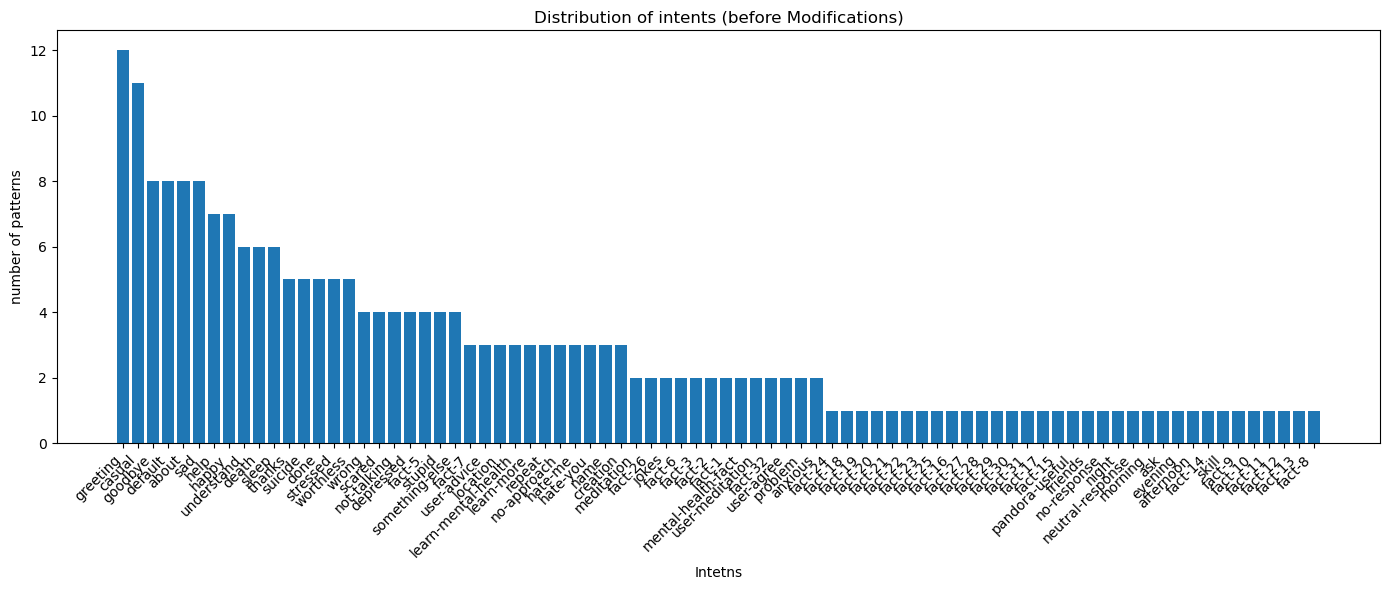

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))

plt.bar(df['tag'].value_counts().index,df['tag'].value_counts().values)

plt.title('Distribution of intents (before Modifications)')
plt.xlabel('Intetns')
plt.ylabel('number of patterns')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

now we discoved that the dataset has a sever imbalance, as the ratio between a tag containing a biggest number of patterns and a tag containing minmum number of patterns is 12/1 , this difinitly affect on learning our model making it baised to some tags and cannot generilize extracuted information -learned by the model which depend on it to classify data- well

Now my goal in solving an imbalanced dataset Is to make my model generalize well from the minority of tags with only one pattern per tag, for if a user typed An input Not identical to one of these patterns (that belong to minority tags) but is related to them(they have the same meaning but indirect speech). I want my model to correctly classify this input To these minority Classes(here  I mean tags.) from what I have learned of techniques until now.


If we split the dataset without addressing the imbalance, patterns associated with tags that have only one instance may end up in the validation or testing sets rather than the training set. As a result, the model will never encounter these patterns during training, leading to a failure to generalize to these minority classes during validation or testing, regardless of the model's overall strength.
Thus we have to solve it first before modelling.

### Solving the imbalance in the dataset


This issue has been resolved in a different environment using the Pegasus paraphraser model from the Transformers library. You can find all the details about this process in the GitHub repository under the file named "data augmentation" at this link: (https://github.com/Selim9-9/Chatbot-For-Mental-Health/tree/main/data%20augmentation). Now, I will proceed with training our chatbot model using this newly enhanced and balanced dataset.

In [33]:
with open("data/New-data.json") as f:
    data2 = json.load(f)
dic2  = {"tag":[] ,"patterns":[], "responses":[]}
for example in data2['intents']:
    for pattern in example["patterns"]:
        dic2["patterns"].append(pattern)
        dic2["tag"].append(example["tag"])
        dic2["responses"].append(example["responses"])
   
df2 = pd.DataFrame.from_dict(dic2)


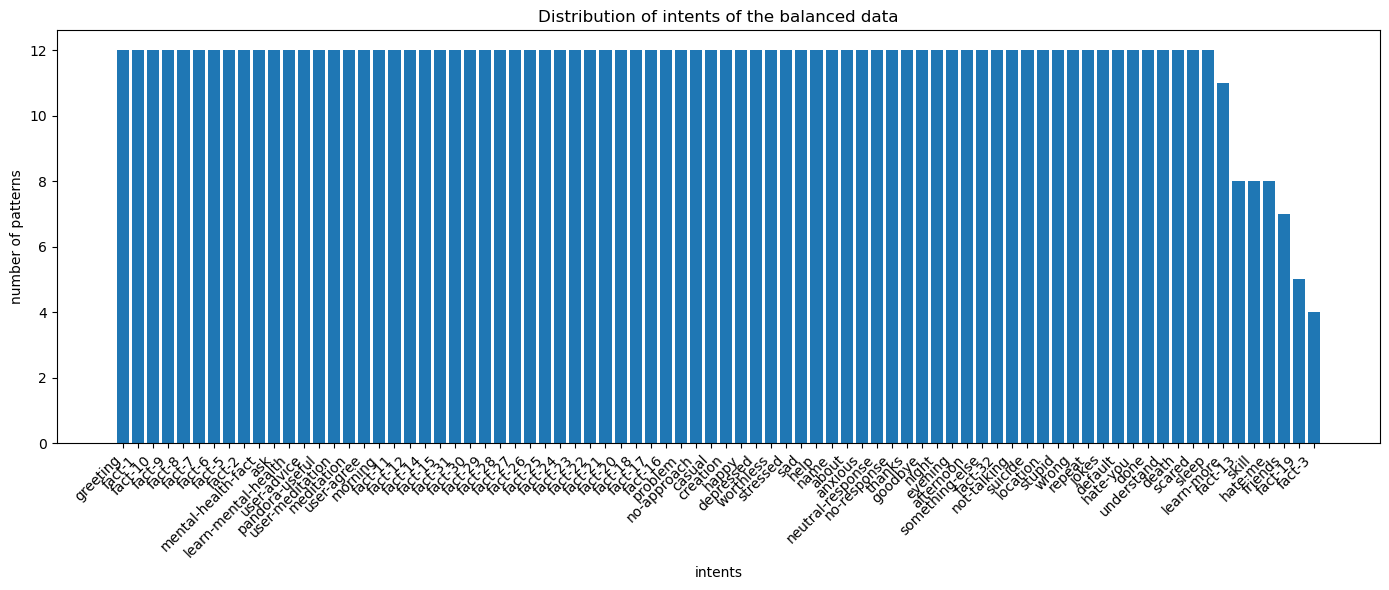

In [34]:
plt.figure(figsize=(14,6))

plt.bar(df2['tag'].value_counts().index,df2['tag'].value_counts().values)

plt.title('Distribution of intents of the balanced data')
plt.xlabel("intents")
plt.ylabel("number of patterns")

plt.xticks(rotation = 45  , ha = "right")
plt.tight_layout()

plt.show()

This is a perfect results comapred to the original data distribustion, let's continue...

In [35]:
df2.describe()

,tag,patterns,responses
count,927,927,927
unique,80,898,80
top,greeting,it was good to start the day.,"[Hello there. Tell me how are you feeling today?, Hi there. What brings you here today?, Hi there. How are you feeling today?, Great to see you. How do you feel currently?, Hello there. Glad to see you're back. What's going on in your world right now?]"
freq,12,3,12


In [36]:
df2[df2['patterns'].duplicated()]

,tag,patterns,responses
25,afternoon,a good start to the day.,[Good afternoon. How is your day going?]
31,afternoon,good start to the day.,[Good afternoon. How is your day going?]
33,afternoon,it was good to start the day.,[Good afternoon. How is your day going?]
36,evening,it is a nice day.,[Good evening. How has your day been?]
37,evening,it is a nice morning.,[Good evening. How has your day been?]
39,evening,good morning.,[Good evening. How has your day been?]
40,evening,good start to the day.,[Good evening. How has your day been?]
43,evening,it was good to start the day.,[Good evening. How has your day been?]
45,evening,it is a good day.,[Good evening. How has your day been?]
46,evening,it is a good morning.,[Good evening. How has your day been?]


In [37]:
df2.drop_duplicates(subset=['patterns'],inplace=True)

In [38]:
df2['patterns'].duplicated().sum()

0

In [39]:
class_names = df2['tag'].unique()
class_names

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
       'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
       'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
       'fact-28', 'fact-29', '

In [40]:
len(class_names)

80

## preprocessing

### 1- Keras Tokenization


Why we are using oov_token=' < OOV >':
Since we are using a pre-trained Word2Vec model (and not training the Keras embedding layer on our vocabulary),
we set the embedding layer to trainable=False. 
This ensures that if a word is not found in the Word2Vec vocabulary, it will be replaced by <OOV> during tokenization
and assigned the vector of the < OOV > token from the embedding matrix.


In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder

tokenizer = Tokenizer(lower=True,oov_token='<OOV>')

tokenizer.fit_on_texts(dic2['patterns'])

tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': '<OOV>',
 'document_count': 927,
 'word_counts': '{"is": 138, "anyone": 2, "there": 62, "ola": 1, "hey": 2, "hi": 2, "howdy": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "hola": 1, "bonjour": 1, "hello": 1, "it": 114, "was": 28, "great": 10, "to": 144, "wake": 2, "up": 7, "a": 157, "good": 30, "start": 15, "the": 74, "day": 21, "warm": 1, "nice": 15, "morning": 7, "afternoon": 1, "night": 9, "evening": 5, "wonderful": 1, "goodbye": 3, "ok": 4, "bye": 4, "fare": 1, "thee": 1, "well": 19, "it\'s": 3, "alright": 1, "over": 4, "then": 1, "see": 2, "you": 131, "later": 1, "sayonara": 1, "au": 1, "revoir": 1, "that\'s": 5, "helpful": 3, "thank": 8, "so": 16, "much": 14, "very": 17, "for": 59, "help": 20, "that": 41, "thanks": 4, "assistance": 8, "useful": 12, "than": 1, "person": 6, "someone": 10, "raining": 1, "n": 1, "vvvvvvvvvvvvv": 1, "there\'s": 1, "so

In [42]:
print(tokenizer.word_index)

{'<OOV>': 1, 'i': 2, 'mental': 3, 'what': 4, 'a': 5, 'health': 6, 'to': 7, 'is': 8, 'you': 9, 'it': 10, 'are': 11, 'can': 12, 'do': 13, 'about': 14, 'the': 15, 'my': 16, 'know': 17, 'of': 18, 'there': 19, 'me': 20, 'for': 21, "i'm": 22, 'illness': 23, 'am': 24, "don't": 25, 'if': 26, 'feel': 27, 'that': 28, 'should': 29, 'and': 30, 'not': 31, 'how': 32, 'like': 33, 'be': 34, 'need': 35, 'good': 36, 'more': 37, 'have': 38, 'want': 39, 'in': 40, 'treatment': 41, 'was': 42, 'possible': 43, 'find': 44, 'where': 45, 'would': 46, 'professional': 47, 'something': 48, 'get': 49, 'with': 50, 'between': 51, 'tell': 52, 'depression': 53, 'day': 54, 'think': 55, 'help': 56, 'well': 57, 'myself': 58, 'issues': 59, 'child': 60, 'problems': 61, 'causes': 62, 'very': 63, 'on': 64, 'stressed': 65, 'therapy': 66, 'which': 67, 'professionals': 68, 'different': 69, 'so': 70, 'start': 71, 'nice': 72, 'did': 73, 'exams': 74, 'new': 75, 'difference': 76, 'much': 77, 'else': 78, 'friends': 79, 'no': 80, 'who'

### 2- Padding

In [43]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

pttrn2seq = tokenizer.texts_to_sequences(df2['patterns'])
x = pad_sequences(pttrn2seq,padding='post')
print(f'x shape : {x.shape}')


le = LabelEncoder()
z = le.fit_transform(df2['tag'])
y = to_categorical(z,num_classes=80)
print(f'y shape : {y.shape}')


x shape : (898, 18)
y shape : (898, 80)


The default behavior of pad_sequences() is to:
- Find the longest sequence in the dataset.
- Use that length as maxlen unless explicitly specified.
- Pad shorter sequences with zeros (0s) at the end (post padding).

x shape : (898, 18) indicates that maxlen of test_to_sequences are auto-detected to 18, we will need this again later.

By encoding our labels with both LabelEncoder and to_categorical, we not only comply with standard deep learning
practices but also set our chatbot up for better classification accuracy, improved interpretability, and easier model
debugging. In multi-class settings with many classes, this approach is generally the most robust and effective way to
represent categorical targets.

let's make some checks..

In [44]:
import numpy as np
np.unique(z)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [45]:
z[:5]

array([44, 44, 44, 44, 44])

In [46]:
print(y[:5])  # Should have only one '1' per row, all in column 44
print(np.sum(y[:5], axis=1))  # Should be all ones (ensuring valid one-hot)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0.

In [47]:
y[1]  # we see one data point's class how it is(which one from the 80 classes it is)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [48]:
# example
x[551]

array([188,  20,  17,  37,  14,   3,   6,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0])

### 3- Importing pretrained word2vec model

I will load pre-trained embeddings (GoogleNews-vectors-negative300.bin) to represent user inputs.
This provides semantic grounding and is useful in detecting similar intents for varied user phrasing.
Here is the [link](https://www.kaggle.com/datasets/sandreds/googlenewsvectorsnegative300) to that model.

In [50]:
import gensim
from gensim.models import KeyedVectors
wor2vec_path = r"F:\GoogleNews-vectors-negative300.bin" # choose your pretrained model path
word2vec  = KeyedVectors.load_word2vec_format(wor2vec_path,binary=True)

### 4- making the  word2 vec matrix

In [51]:

vocab_size =len(tokenizer.word_index ) + 1 # 1 for padding
embedding_matrix = np.zeros((vocab_size, 300)) # 300 is embedding_dimnesion 

In [52]:
for word , i in tokenizer.word_index.items():
    if word in word2vec:
        embedding_matrix[i] = word2vec[word]
    else:
        embedding_matrix[i] = np.zeros((300)) # all unknown words share this vector

In [53]:
embedding_matrix[2]

array([-2.25585938e-01, -1.95312500e-02,  9.08203125e-02,  2.37304688e-01,
       -2.92968750e-02,  9.32617188e-02, -5.88378906e-02, -4.10156250e-02,
        5.22460938e-02,  2.00195312e-02, -3.44238281e-02, -2.91015625e-01,
       -2.61718750e-01, -1.90429688e-01,  3.85742188e-02,  8.30078125e-03,
        3.14941406e-02,  7.47070312e-02,  1.14746094e-01,  1.24511719e-02,
       -2.11914062e-01,  1.28906250e-01,  2.55859375e-01,  1.08886719e-01,
       -7.03125000e-02,  1.60156250e-01, -4.00390625e-01, -1.16699219e-01,
       -3.22265625e-02, -6.73828125e-02,  1.55273438e-01,  1.25000000e-01,
       -6.22558594e-02,  3.56445312e-02, -1.79687500e-01,  1.58203125e-01,
       -2.53906250e-01,  1.74804688e-01, -1.18164062e-01, -2.19726562e-03,
        1.49536133e-02, -5.71289062e-02,  2.39257812e-01,  1.36718750e-01,
        1.47460938e-01,  7.08007812e-02,  1.72851562e-01, -2.38281250e-01,
       -5.71289062e-02, -1.04492188e-01,  2.23388672e-02,  8.74023438e-02,
        1.43554688e-01,  

In [54]:
len(embedding_matrix[3])

300

### 5- Splitting

In [55]:
from sklearn.model_selection import train_test_split

# Split the data into train+val and test sets (stratified by y)
x_train_val,x_test, y_train_val,y_test =  train_test_split(x,y,test_size= 0.18, random_state= 42, stratify= y)

# Split the train+val data into train and validation sets (stratified by y_train_val)
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val,test_size=0.16, random_state= 42, stratify=y_train_val)


In [56]:

# Check the sizes 
print(f"Train set size: {len(x_train)}")
print(f"Validation set size: {len(x_val)}")
print(f"Test set size: {len(x_test)}")



Train set size: 618
Validation set size: 118
Test set size: 162


In [57]:
print(len(y))
print(y)

898
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
print(len(y[444]))
print(y[444])


80
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


## Model Development

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, Dropout,LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1L2


model = Sequential()

model.add(Embedding(input_dim= vocab_size,
                    output_dim= 300,
                    input_length = 18,
                    weights= [embedding_matrix],
                    trainable= False ))


model.add(LSTM(50,recurrent_dropout= 0.3 ))
model.add(Dropout(0.3))



model.add(Dense(80,activation = 'softmax',kernel_regularizer =L1L2(l2=0.001))) # 80 intents (classes)

model.compile(optimizer= Adam(learning_rate=0.001), loss= 'categorical_crossentropy',metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 300)           137700    
                                                                 
 lstm (LSTM)                 (None, 50)                70200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 80)                4080      
                                                                 
Total params: 211980 (828.05 KB)
Trainable params: 74280 (290.16 KB)
Non-trainable params: 137700 (537.89 KB)
_________________________________________________________________


In [60]:
early_stop = EarlyStopping(monitor = 'accuracy',patience = 4)

reduce_lr = ReduceLROnPlateau(monitor='accuracy',factor= 0.8, patience= 3, min_lr = 0.00015)

In [61]:
history = model.fit(x_train,y_train,batch_size= 16,epochs= 60,
                    validation_data= (x_val,y_val),
                    callbacks=[early_stop,reduce_lr])

Epoch 1/60
39/39 [==============================] - 3s 13ms/step - loss: 4.4286 - accuracy: 0.0259 - val_loss: 4.3976 - val_accuracy: 0.0508 - lr: 0.0010
Epoch 2/60
39/39 [==============================] - 0s 7ms/step - loss: 4.2838 - accuracy: 0.0324 - val_loss: 4.1477 - val_accuracy: 0.0763 - lr: 0.0010
Epoch 3/60
39/39 [==============================] - 0s 6ms/step - loss: 4.0450 - accuracy: 0.0437 - val_loss: 3.9325 - val_accuracy: 0.0932 - lr: 0.0010
Epoch 4/60
39/39 [==============================] - 0s 6ms/step - loss: 3.8716 - accuracy: 0.0615 - val_loss: 3.7798 - val_accuracy: 0.1102 - lr: 0.0010
Epoch 5/60
39/39 [==============================] - 0s 6ms/step - loss: 3.7298 - accuracy: 0.0971 - val_loss: 3.6564 - val_accuracy: 0.1271 - lr: 0.0010
Epoch 6/60
39/39 [==============================] - 0s 6ms/step - loss: 3.6026 - accuracy: 0.1052 - val_loss: 3.5475 - val_accuracy: 0.1780 - lr: 0.0010
Epoch 7/60
39/39 [==============================] - 0s 6ms/step - loss: 3.4839 - 

## Model Performance

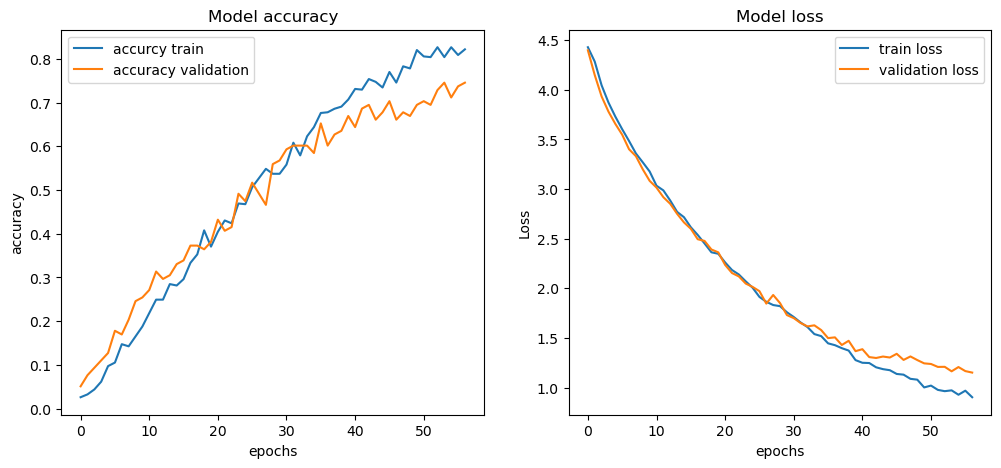

In [62]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(12,5))

axes[0].plot(history.history["accuracy"], label= "accurcy train")
axes[0].plot(history.history["val_accuracy"], label= "accuracy validation")
axes[0].set_title("Model accuracy")
axes[0].set_xlabel("epochs")
axes[0].set_ylabel("accuracy")
axes[0].legend()

axes[1].plot(history.history["loss"], label= "train loss")
axes[1].plot(history.history["val_loss"], label= "validation loss")
axes[1].set_title("Model loss")
axes[1].set_xlabel("epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

In [63]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(x_val,y_val,)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}") 


4/4 [==============================] - 0s 2ms/step - loss: 1.1519 - accuracy: 0.7458
Validation Loss: 1.1518996953964233
Validation Accuracy: 0.7457627058029175


#####  Testing

In [64]:
# make predictions from the model on the test set 
y_pred = model.predict(x_test)

# Convert predictions to class labels (because we're using softmax)
# y_pred is a 2D array (e.g., shape (num_samples, num_classes))

y_pred_labels = tf.argmax(y_pred, axis=1).numpy() #this function selects the index of the highest probability for each sample.
# get the index true classes 
y_true_labels = tf.argmax(y_test, axis=1).numpy()

6/6 [==============================] - 0s 1ms/step


In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels,y_pred_labels,average="weighted")
recall = recall_score(y_true_labels,y_pred_labels,average="weighted")
f1 = f1_score(y_true_labels,y_pred_labels,average="weighted")
print(f"accracy score= {accuracy}")
print(f"precision score= {precision}")
print(f"recall score= {recall}")
print(f"f1 score= {f1}")

accracy score= 0.7716049382716049
precision score= 0.772119341563786
recall score= 0.7716049382716049
f1 score= 0.7477660199882422


f:\Anaconda_Navigator\envs\my_h5py_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I see this is a very good performance with such a small dataset with the Deep Learning technique.

additional info...:

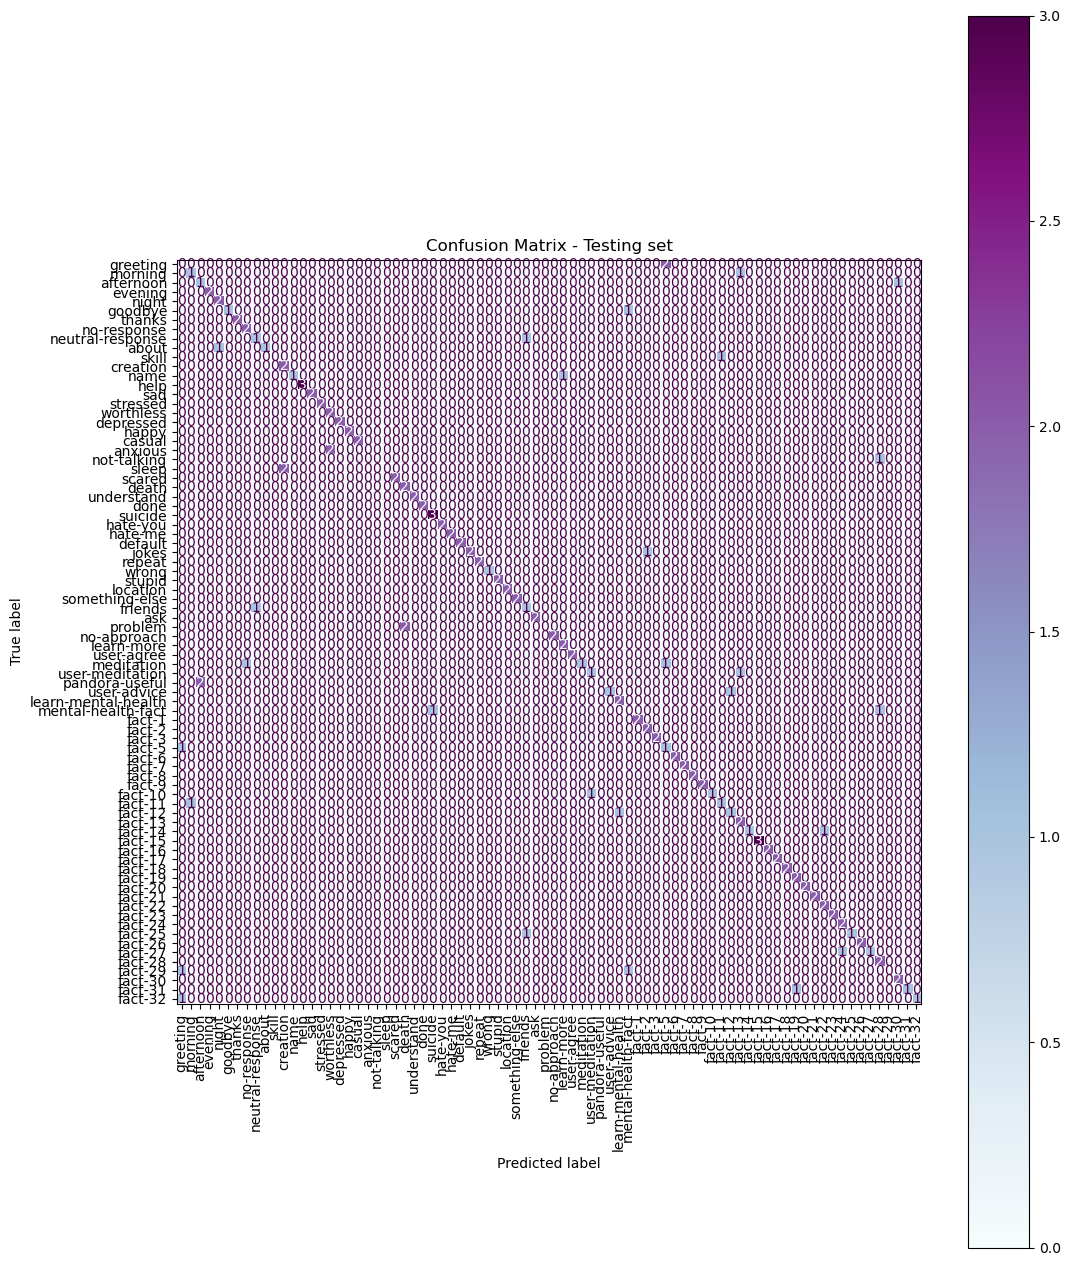

In [66]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_labels,y_pred_labels)

fig, ax = plt.subplots(figsize=(12,16))

ConfusionMatrixDisplay(cm,display_labels= class_names ).plot(cmap="BuPu",xticks_rotation='vertical',ax=ax)

ax.set_title("Confusion Matrix - Testing set")
plt.show()

In [67]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_true_labels,y_pred_labels,target_names=class_names))

                     precision    recall  f1-score   support

           greeting       0.00      0.00      0.00         2
            morning       0.50      0.50      0.50         2
          afternoon       0.33      0.50      0.40         2
            evening       1.00      1.00      1.00         2
              night       0.67      1.00      0.80         2
            goodbye       1.00      0.50      0.67         2
             thanks       1.00      1.00      1.00         2
        no-response       0.67      1.00      0.80         2
   neutral-response       0.50      0.50      0.50         2
              about       1.00      0.50      0.67         2
              skill       0.00      0.00      0.00         1
           creation       0.50      1.00      0.67         2
               name       1.00      0.50      0.67         2
               help       1.00      1.00      1.00         3
                sad       1.00      1.00      1.00         2
           stressed    

f:\Anaconda_Navigator\envs\my_h5py_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\Anaconda_Navigator\envs\my_h5py_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\Anaconda_Navigator\envs\my_h5py_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Saving the model

Checking the Model:
During inference, the Embedding layer automatically maps the word indices to their corresponding 300-dimensional Word2Vec vectors. The model will internally handle the Word2Vec mapping before making predictions. The model already outputs probability distributions, so we only need tf.argmax() to get the class index.

In [68]:
inp = "I want to work"

sent = pad_sequences(tokenizer.texts_to_sequences([inp]),padding="post",maxlen=18)
print(sent)
print(f"sent shape is {sent.shape}")

resut = tf.argmax(model.predict(sent), axis=1)
final_result = le.inverse_transform(np.array(resut).reshape(1))
print(f" the tag is : {final_result}")


[[ 2 39  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
sent shape is (1, 18)
1/1 [==============================] - 0s 53ms/step
 the tag is : ['stupid']


In [69]:
import pickle as pk
pk.dump(tokenizer,open("models/tokenizer_.pkl","wb"))
pk.dump(le,open("models/label-encoder.pkl","wb"))
model.save("models/DL-model.h5")

f:\Anaconda_Navigator\envs\my_h5py_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Done